In [22]:
import pandas as pd
df = pd.read_csv('Reviews_dataset.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [24]:
df.shape

(568454, 10)

In [25]:
df.dropna(subset = ["Summary", "ProfileName"], inplace=True)

In [26]:
df.shape

(568411, 10)

In [27]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

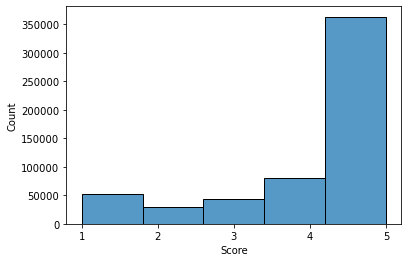

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=df, x="Score", bins =5, ax=ax)
ax.set_xticks(range(1,6,1))
plt.savefig(r"C:\Users\ishri\Documents\Portfolio\Sentiment_analysis\count.png", dpi = 300)

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
comments = ''
stopwords = set(STOPWORDS)

In [31]:
for word in df.Summary:
    word = str(word)
    tokens = word.split()
    comments += " ".join(tokens)+" "

In [32]:
wordcloud = WordCloud(background_color ='pink',
                stopwords = stopwords,
                min_font_size = 10).generate(comments)

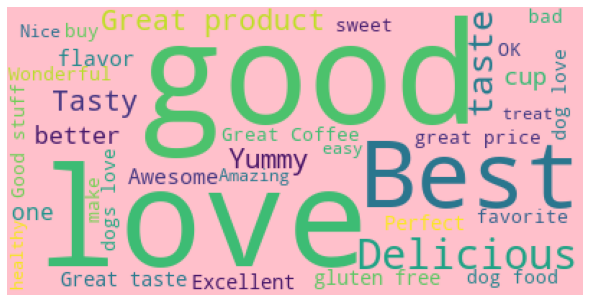

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
plt.savefig(r"C:\Users\ishri\Documents\Portfolio\Sentiment_analysis\overall_summary.png", dpi = 300)

In [14]:
## Assigning sentiment

#df = df[df['Score'] != 3]
df['sentiment_score'] = df['Score'].apply(lambda rating_ : +1 if rating_ > 3 if rating < 3: -1 else 0)

SyntaxError: invalid syntax (<ipython-input-14-606ba0e974b8>, line 4)

In [34]:
def sentiment(df):
    if df['Score'] ==  3:
        return 0
    elif df['Score'] < 3:
        return -1
    else:
        return 1

df['Sentiment_score'] = df.apply(sentiment, axis=1)

In [36]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,1
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


In [38]:
positive_words = df[df['Sentiment_score'] == 1]
negative_words = df[df['Sentiment_score'] == -1]
neutral_words = df[df['Sentiment_score'] == 0]

In [39]:
stopwords = set(STOPWORDS)
stopwords.update(["good","great"])

In [40]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'good',
 'great',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',


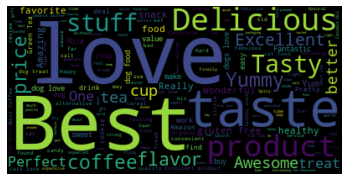

In [41]:
positive_wordcloud = " ".join(words for words in positive_words.Summary)
pos_wordcloud = WordCloud(stopwords=stopwords).generate(positive_wordcloud)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"C:\Users\ishri\Documents\Portfolio\Sentiment_analysis\positive.png", dpi = 300)
plt.show()


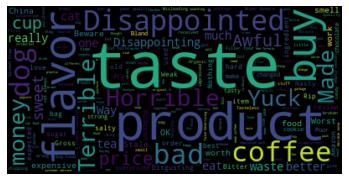

In [23]:
negative_wordcloud = " ".join(words for words in negative_words.Summary)
neg_wordcloud = WordCloud(stopwords=stopwords).generate(negative_wordcloud)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"C:\Users\ishri\Documents\Portfolio\Sentiment_analysis\negative.png", dpi = 300)
plt.show()


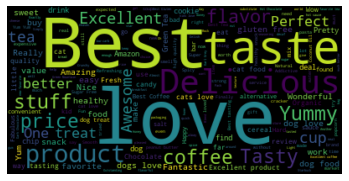

In [42]:
neutral_wordcloud = " ".join(words for words in neutral_words.Summary)
neu_wordcloud = WordCloud(stopwords=stopwords).generate(positive_wordcloud)
plt.imshow(neu_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"C:\Users\ishri\Documents\Portfolio\Sentiment_analysis\neutral.png", dpi = 300)
plt.show()

In [43]:
def punctuation_removal(text):
    end_summary = "".join(p for p in text if p not in (",", ";",":", "!","?",'"'))
    return end_summary
    

In [44]:
df['Text'] = df['Text'].apply(punctuation_removal)
df['Summary'] = df['Summary'].apply([punctuation_removal])

In [46]:
df_processed = df[['Summary','Sentiment_score']]
df_processed.head()

,Summary,Sentiment_score
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1


In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_processed, test_size=0.2)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(token_pattern=r'\b\w+\b')
train_X = vector.fit_transform(train['Summary'])
test_X = vector.transform(test['Summary'])

In [49]:
train_X.shape

(454728, 30801)

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs', max_iter=1000)

In [52]:
train_Y = train['Sentiment_score']
test_Y = test['Sentiment_score']

In [53]:
regressor.fit(train_X,train_Y)

LogisticRegression(max_iter=1000)

In [54]:
predictions = regressor.predict(test_X)

In [55]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(predictions,test_Y))

              precision    recall  f1-score   support

          -1       0.65      0.73      0.69     14616
           0       0.23      0.54      0.33      3679
           1       0.97      0.90      0.93     95388

    accuracy                           0.87    113683
   macro avg       0.62      0.73      0.65    113683
weighted avg       0.90      0.87      0.88    113683



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(train_X, train_Y)
y_pred = regressor2.predict(test_X)

In [ ]:
print(classification_report(y_pred,test_Y))